# Spinodal Decomposition in 2 D using CH equation 

This is a classical problem in Phase Field Modelling. The steps we follow here, need to be followed in every problem. 

- Step 1 : Always decide what is going to be the "order parameter"  describing the microstructure of the system. 

Here the order parameter is "c(composition)" - a conserved paramter

- Step 2 : The thermodynamics. We need to write the free energy functional in terms of order parameter and gradients of order parameter. 

Here 
$ \frac {G}{N_{v}} $ = $ \int (f_{0}(c) + \kappa |\nabla c|^{2})dV $

- Step 3 : We write the evolution equations 

Since here the order paramter is a conserved variable, we use the Cahn-Hilliard equation. 

- Step 4 : Solving the previous equations 

The fourier transformed equation of Cahn-Hilliard Equation in 2D is 

$ \tilde c ^{t + \Delta t} $ = $ (\tilde c - M(k_{x}^{2} + k_{y}^{2}) \Delta t \tilde g ^{t}) /  (1 + 2\kappa M (k_{x}^{2} + k_{y}^{2})^{2} \Delta t ) $

In [4]:
# importing libraries 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import pyplot as plt, cm
%matplotlib inline 
import random 

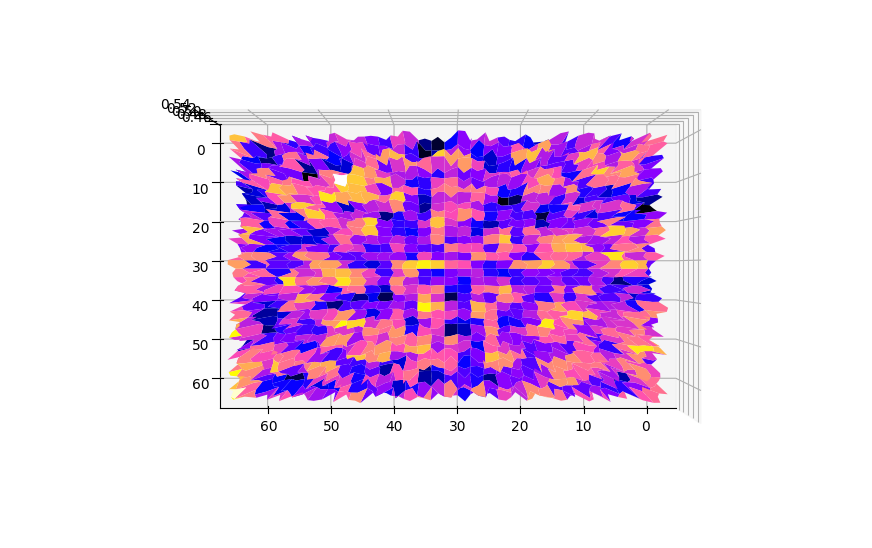

In [5]:
# defining paramters 

Nx = 64 # no. of grid points in x axis 
Ny = 64 # no. of grid points in y axis

dt = 0.5 # time-step 

halfNx = Nx/2
halfNy = Ny/2

# grid points in fourier reciprocal space 
delkx = 2 * np.pi / Nx # in x axis
delky = 2 * np.pi / Ny # in y axis

x = np.arange(0,Nx,1)
y = np.arange(0,Ny,1)

X, Y = np.meshgrid(x, y)

c = np.zeros((Nx,Ny)) # composition 2D vector 

# defining the initial profile
for i in range (0,Nx) :
    for j in range (0,Ny) :
        c[i][j] = 0.5 + 0.1 * (0.5 - random.random())

# plotting the intitial profile 
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, c[:],cmap=cm.gnuplot2) 
ax.view_init(90,90)        

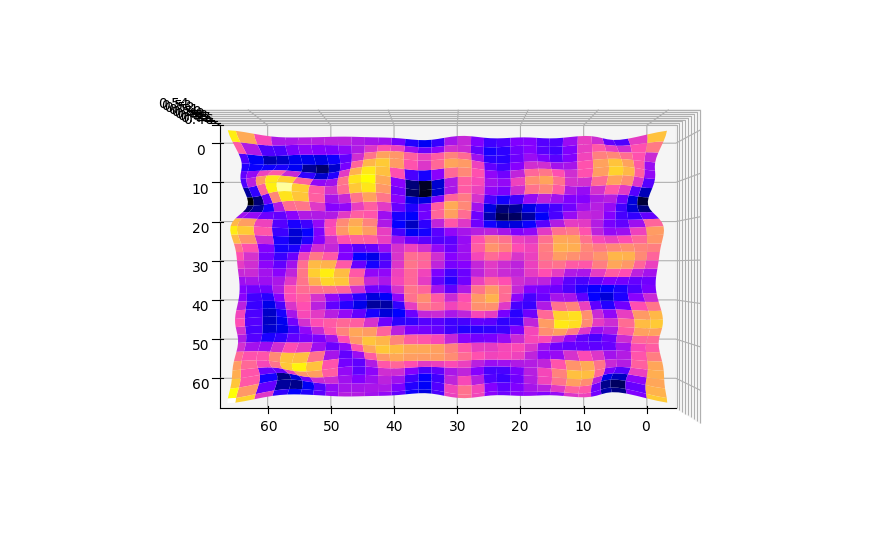

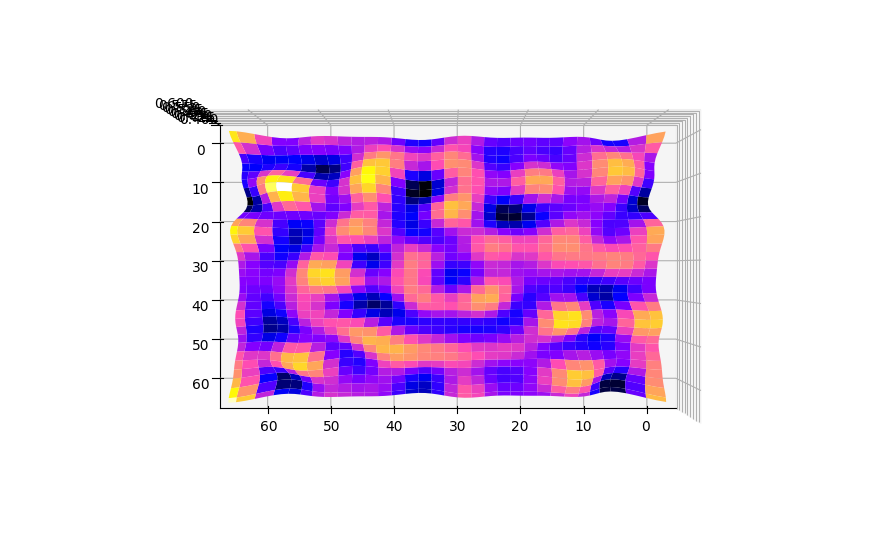

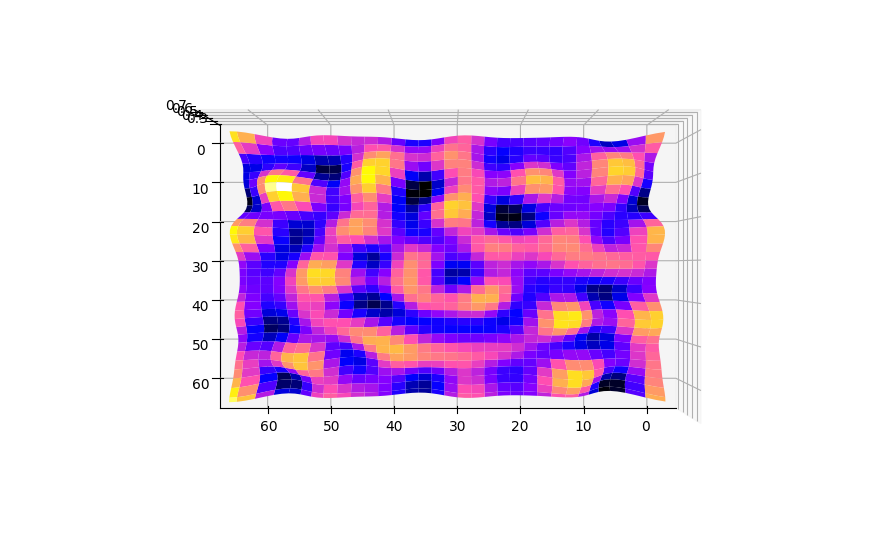

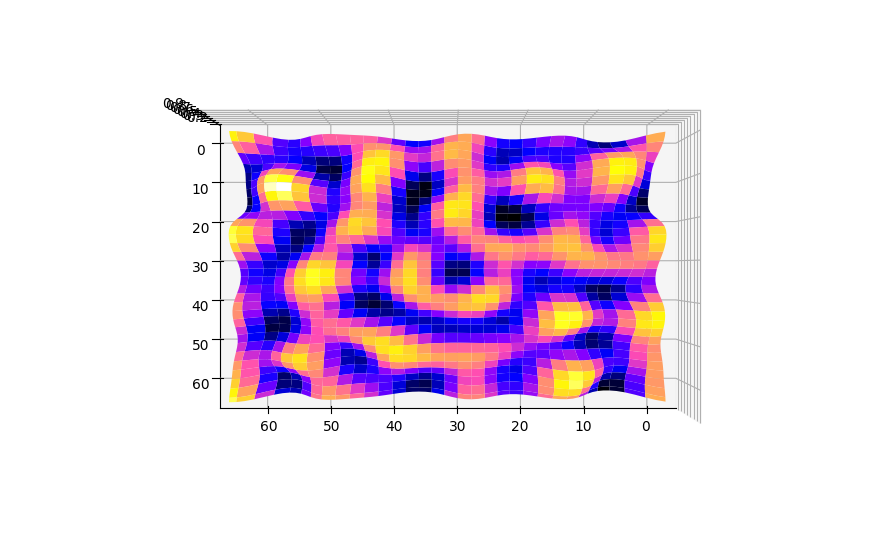

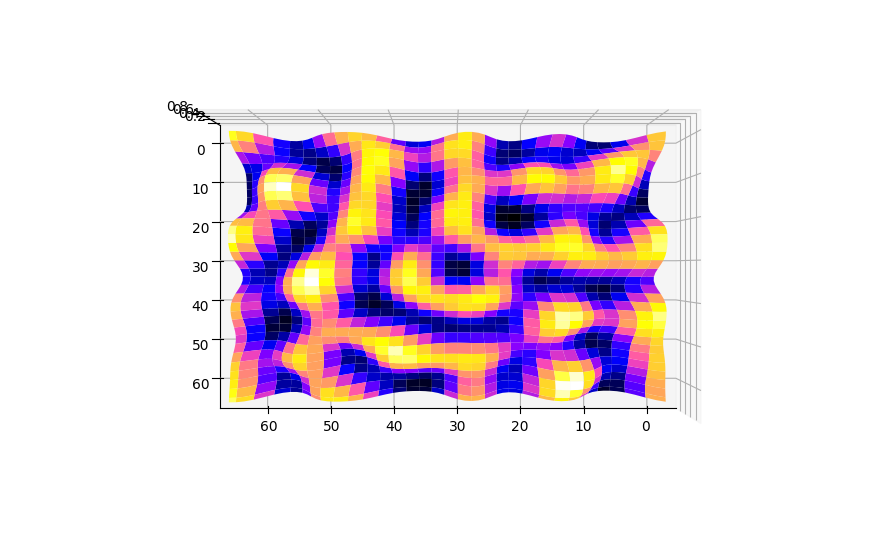

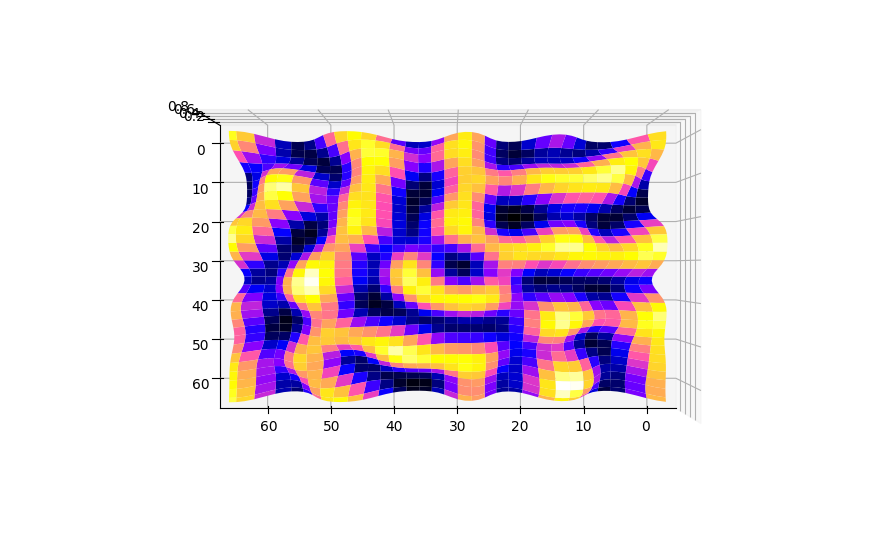

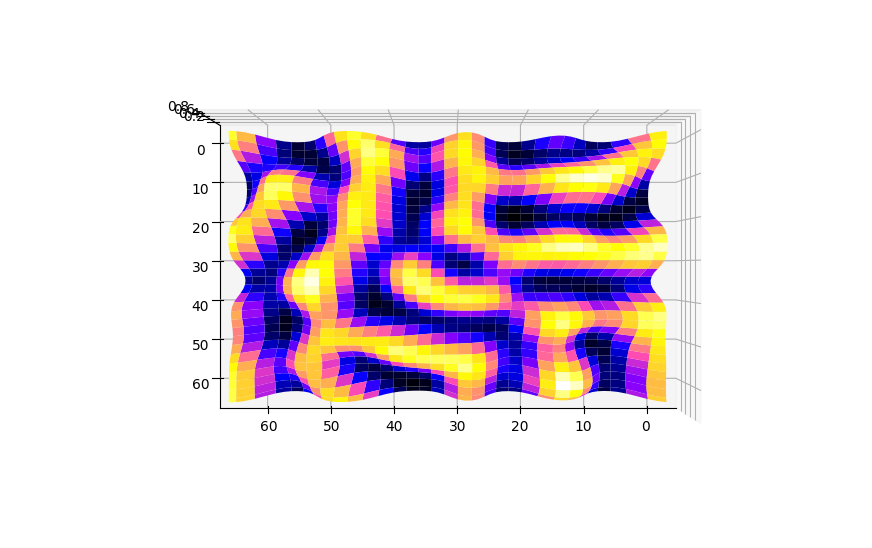

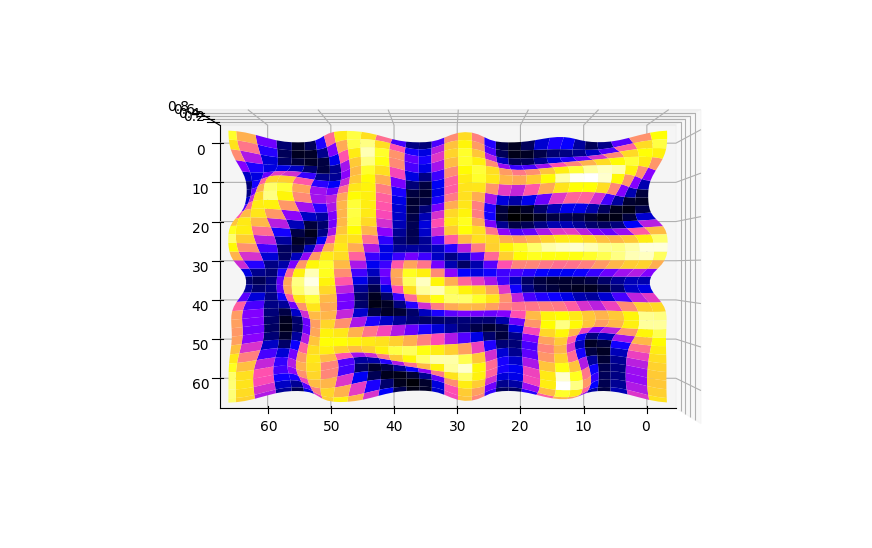

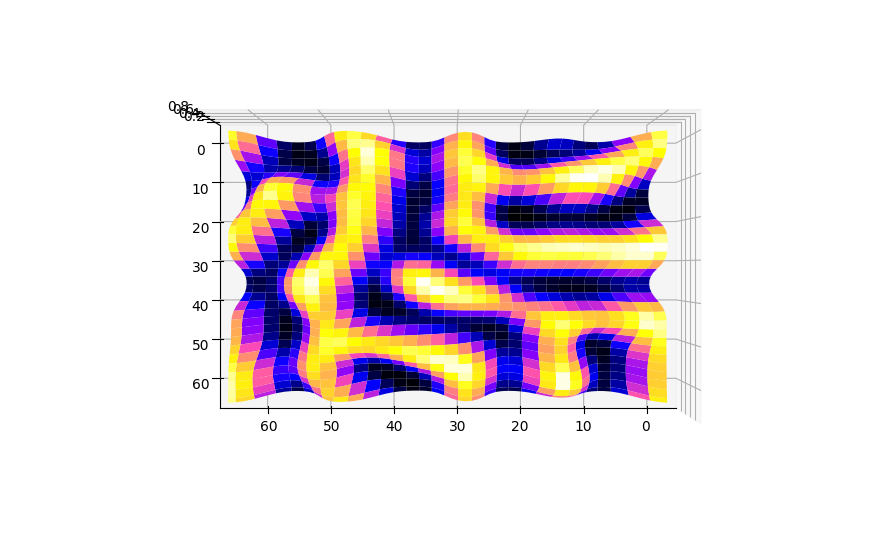

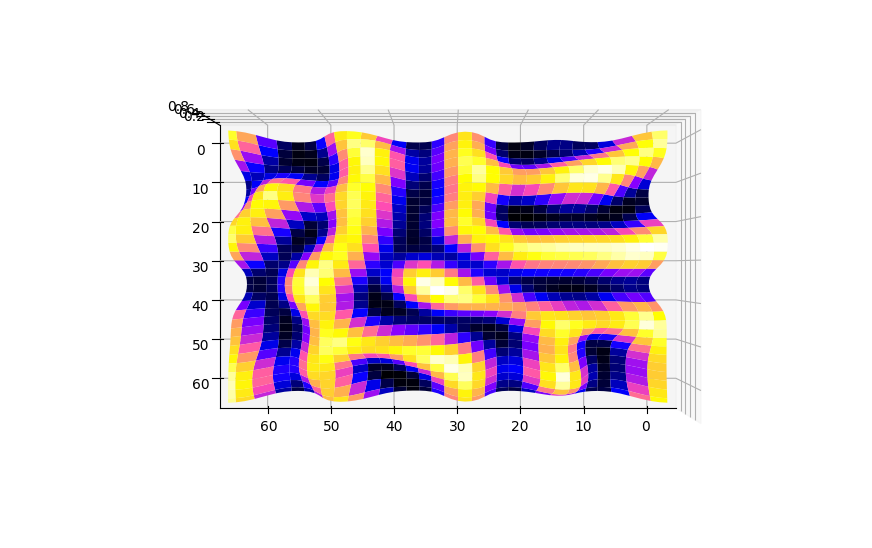

In [6]:
# defining the vectors in fourier reciprocal space

A = 1.0
M = 1.0
kappa = 1.0
kx = 1.0
ky = 1.0

g = np.zeros((Nx,Ny))
ghat = np.zeros((Nx,Ny))
chat = np.zeros((Nx,Ny))


for m in range (0,10): # outer time-loop 
    
    for n in range (0,20): # inner time-loop
        
        # evolving the derivative of f0 function
        for i in range (0,Nx):
            for j in range (0,Ny):
                
                g[i][j] = 2 * A * c[i][j] * (1 - c[i][j]) * (1 - 2*c[i][j])
        
        # taking the fourier transformation
        ghat = np.fft.fft2(g)
        chat = np.fft.fft2(c)
        
        for i in range (0,Nx) :
            # implementing the PBCs for x
            if (i <= halfNx):
                kx = i * delkx
            if (i > halfNx):
                kx = (i-Nx) * delkx
                
            for j in range (0,Ny):
                # implementing the PBCs for y
                if (j <= halfNy):
                    ky = j * delky
                if (j > halfNy):
                    ky = (j-Ny) * delky
            
                k2 = kx ** 2 + ky ** 2
                k4 = k2 ** 2
                # actual evolution 
                chat[i][j] = (chat[i][j] - dt * k2 * M * ghat[i][j]) / (1 + 2 * M * kappa * k4 * dt)
        
        c = np.real(np.fft.ifft2(chat)) 
    # plotting the final profile
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    surf2 = ax.plot_surface(X, Y, c[:], cmap=cm.gnuplot2)
    ax.view_init(90, 90)